In [2]:
# Standard Python imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

# SciPy and other statistical packages
from scipy.stats import ttest_ind
import scipy.stats as stats
import pingouin as pg

# scikit-learn libraries
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, RobustScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

Carga y visualizacion del dataset

In [3]:
# Generate all URLs for 2020
base_url = "https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2020-{:02d}.parquet"
urls = [base_url.format(month) for month in range(1, 13)]

# Read and concatenate all months
dfs = [pd.read_parquet(url) for url in urls]
df = pd.concat(dfs, ignore_index=True)

print("Final dataset:", df.shape)

Final dataset: (24649092, 19)


C:\Users\javier\AppData\Local\Temp\ipykernel_4648\2400012345.py:7: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat(dfs, ignore_index=True)


In [4]:
# Display the first few rows
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.2,1.0,N,238,239,1,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5,NaN
1,1,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.2,1.0,N,239,238,1,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5,NaN
2,1,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.6,1.0,N,238,238,1,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5,NaN
3,1,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.8,1.0,N,238,151,1,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0,NaN
4,2,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.0,1.0,N,193,193,2,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0,NaN


In [5]:
# Display the last few rows
df.tail()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
24649087,2,2020-12-31 23:44:35,2021-01-01 00:01:22,NaN,9.22,NaN,None,143,20,0,32.49,0.0,0.5,8.16,0.00,0.3,43.95,NaN,NaN
24649088,2,2020-12-31 23:41:36,2020-12-31 23:50:32,NaN,4.79,NaN,None,4,262,0,13.22,0.0,0.5,3.65,0.00,0.3,20.17,NaN,NaN
24649089,2,2020-12-31 23:01:17,2020-12-31 23:40:37,NaN,28.00,NaN,None,210,78,0,69.31,0.0,0.5,2.75,6.12,0.3,78.98,NaN,NaN
24649090,2,2020-12-31 23:31:29,2020-12-31 23:44:22,NaN,7.08,NaN,None,148,129,0,35.95,0.0,0.5,2.75,0.00,0.3,39.50,NaN,NaN
24649091,2,2020-12-31 23:12:48,2020-12-31 23:24:51,NaN,2.35,NaN,None,18,235,0,17.09,0.0,0.5,2.75,0.00,0.3,20.64,NaN,NaN


Columnas del dataset y valores faltantes

In [6]:
print(f"Columnas del dataframe:\n{df.dtypes}\n")

Columnas del dataframe:
VendorID                          int64
tpep_pickup_datetime     datetime64[us]
tpep_dropoff_datetime    datetime64[us]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                      int64
DOLocationID                      int64
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
airport_fee                     float64
dtype: object



In [7]:
print(f"Valores faltantes: {df.isnull().sum()}")  # Calculate missing values

Valores faltantes: VendorID                        0
tpep_pickup_datetime            0
tpep_dropoff_datetime           0
passenger_count            809967
trip_distance                   0
RatecodeID                 809967
store_and_fwd_flag         809967
PULocationID                    0
DOLocationID                    0
payment_type                    0
fare_amount                     0
extra                           0
mta_tax                         0
tip_amount                      0
tolls_amount                    0
improvement_surcharge           0
total_amount                    0
congestion_surcharge       809967
airport_fee              24649071
dtype: int64


In [8]:
pickup_dt = pd.to_datetime(df["tpep_pickup_datetime"])
df["pickup_hour"] = pickup_dt.dt.hour
df["pickup_day"] = pickup_dt.dt.day
df["pickup_weekday"] = pickup_dt.dt.weekday
df["pickup_month"] = pickup_dt.dt.month
df["pickup_year"] = pickup_dt.dt.year
print(df['pickup_year'].value_counts().sort_index())

pickup_year
2002           1
2003           2
2008          32
2009          90
2019         131
2020    24648812
2021          24
Name: count, dtype: int64


### Filtrado de datos: eliminación de registros que no pertenecen al año 2020

Se identificaron algunos registros con fechas fuera del año 2020 (menos de 300 en total). Dado que representan una fracción mínima del dataset y podrían deberse a errores en los datos, se decidió eliminarlos para mantener la consistencia temporal del análisis.

In [9]:
# Filter to keep only trips from 2020
df = df[df['tpep_pickup_datetime'].dt.year == 2020].copy()

In [10]:
df["invalid_fare_amount"] = df["fare_amount"].apply(lambda x: x if x < 0 else np.nan)
df["invalid_trip_distance"] = df["trip_distance"].apply(lambda x: x if x < 0 else np.nan)

In [11]:
df.head()  

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,total_amount,congestion_surcharge,airport_fee,pickup_hour,pickup_day,pickup_weekday,pickup_month,pickup_year,invalid_fare_amount,invalid_trip_distance
0,1,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.2,1.0,N,238,239,1,...,11.27,2.5,NaN,0,1,2,1,2020,NaN,NaN
1,1,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.2,1.0,N,239,238,1,...,12.30,2.5,NaN,0,1,2,1,2020,NaN,NaN
2,1,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.6,1.0,N,238,238,1,...,10.80,2.5,NaN,0,1,2,1,2020,NaN,NaN
3,1,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.8,1.0,N,238,151,1,...,8.16,0.0,NaN,0,1,2,1,2020,NaN,NaN
4,2,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.0,1.0,N,193,193,2,...,4.80,0.0,NaN,0,1,2,1,2020,NaN,NaN


In [12]:
# Define categorical columns
categorical_vars = [
    "VendorID", "RatecodeID", "store_and_fwd_flag", "PULocationID", "DOLocationID",
    "payment_type", "pickup_hour", "pickup_weekday", "pickup_month",
]

# Convert them to "category" type
df[categorical_vars] = df[categorical_vars].astype("category")

# Check
print(df[categorical_vars].dtypes)

VendorID              category
RatecodeID            category
store_and_fwd_flag    category
PULocationID          category
DOLocationID          category
payment_type          category
pickup_hour           category
pickup_weekday        category
pickup_month          category
dtype: object


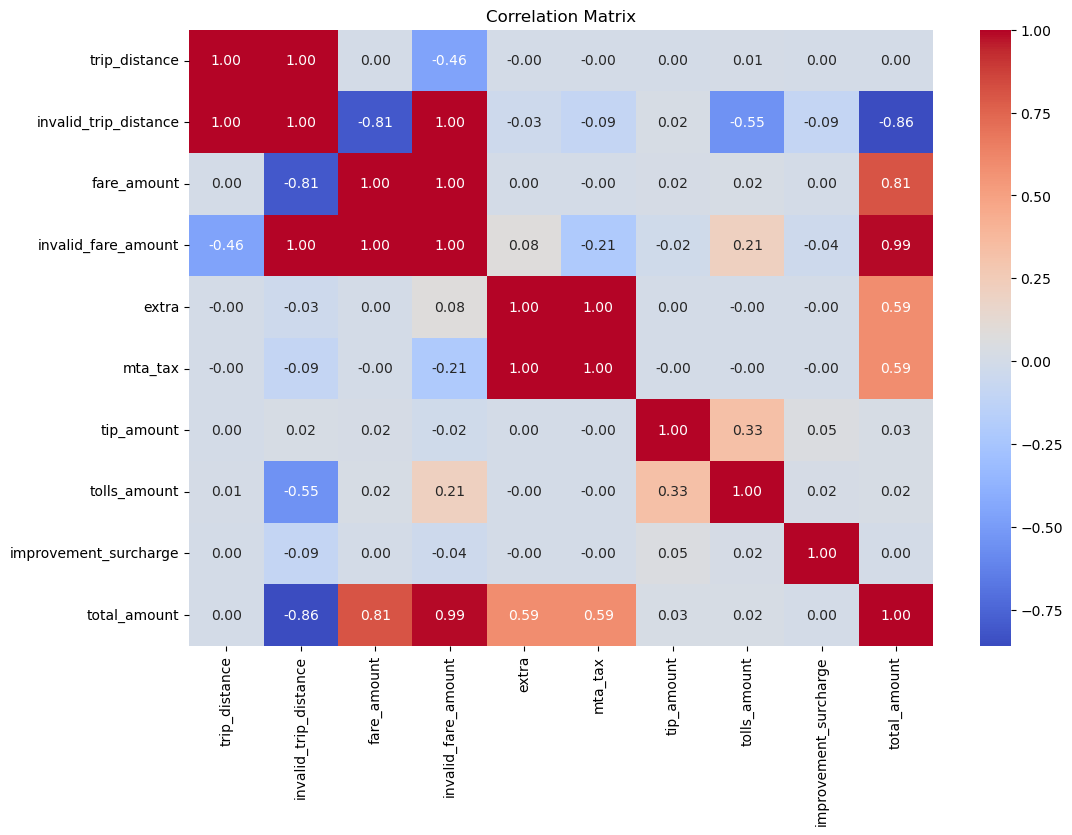

In [13]:
# Select numerical and relevant columns for the heatmap
column_heatmap = [
    "trip_distance", "invalid_trip_distance", "fare_amount", "invalid_fare_amount", "extra", "mta_tax", "tip_amount",
    "tolls_amount", "improvement_surcharge", "total_amount",
]

df_heatmap = df[column_heatmap]

correlation_matrix = df_heatmap.corr()  # Calculate the correlation matrix

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [14]:
corr_pairs = correlation_matrix.abs().where(~np.eye(correlation_matrix.shape[0], dtype=bool)).stack()
top_corr = corr_pairs.sort_values(ascending=False).head(25)

print(top_corr)

trip_distance          invalid_trip_distance    1.000000
invalid_trip_distance  trip_distance            1.000000
fare_amount            invalid_fare_amount      1.000000
invalid_fare_amount    fare_amount              1.000000
invalid_trip_distance  invalid_fare_amount      1.000000
invalid_fare_amount    invalid_trip_distance    1.000000
extra                  mta_tax                  0.999924
mta_tax                extra                    0.999924
invalid_fare_amount    total_amount             0.988199
total_amount           invalid_fare_amount      0.988199
invalid_trip_distance  total_amount             0.858585
total_amount           invalid_trip_distance    0.858585
fare_amount            total_amount             0.805857
total_amount           fare_amount              0.805857
invalid_trip_distance  fare_amount              0.805692
fare_amount            invalid_trip_distance    0.805692
extra                  total_amount             0.592015
total_amount           extra   

In [15]:
# How many records with invalid_trip_distance also have invalid_fare_amount
trip_fare_invalid = df[(df["invalid_trip_distance"].notna()) & (df["invalid_fare_amount"].notna())]
print("Invalid trip & fare amount:", len(trip_fare_invalid))

# How many invalid_trip_distance have valid fare_amount
trip_invalid_fare_valid = df[(df["invalid_trip_distance"].notna()) & (df["invalid_fare_amount"].isna())]
print("Invalid trip but valid fare:", len(trip_invalid_fare_valid))

# How many invalid_fare_amount have valid trip_distance
fare_invalid_trip_valid = df[(df["invalid_fare_amount"].notna()) & (df["invalid_trip_distance"].isna())]
print("Invalid fare but valid trip:", len(fare_invalid_trip_valid))

Invalid trip & fare amount: 3
Invalid trip but valid fare: 2335
Invalid fare but valid trip: 92825


### Análisis de correlaciones

Se observa una fuerte correlación entre variables directamente relacionadas al precio del viaje, como `fare_amount`, `total_amount`, `extra` y `mta_tax`. Esto era esperable, ya que muchas de estas variables forman parte del cálculo del monto total.

Además, hay una correlación perfecta entre `fare_amount` e `invalid_fare_amount`, lo cual tiene sentido ya que esta última representa una subcategoría de la primera: solo toma valor cuando la tarifa es inválida (negativa), y en los demás casos es nula, por lo que no influye en la matriz de correlación. Lo mismo ocurre con `trip_distance` e `invalid_trip_distance`, que también presentan una correlación perfecta entre sí.

A su vez, `invalid_fare_amount` e `invalid_trip_distance` parecen estar fuertemente correlacionadas (~1.0), pero esto se debe a la presencia de valores nulos en ambas: solo tres observaciones presentan valores no nulos en ambas variables. Se observa también una correlación alta entre `invalid_trip_distance` y `fare_amount` (0.805692), y una correlación media entre `invalid_fare_amount` y `trip_distance` (0.461607).

Esto sugiere que los valores inválidos no son completamente aleatorios, sino que podrían clasificarse como **Missing At Random (MAR)**. Dado que los registros con `invalid_trip_distance` y `invalid_fare_amount` representan una proporción muy baja del total del dataset (~2.300 y ~9.300 respectivamente, en más de 24 millones), se puede optar por analizar dos enfoques:

1. Imputar los datos inválidos utilizando las variables más relevantes en cada caso.
2. Eliminar directamente las filas que contienen estos valores.

In [16]:
df["is_invalid_fare_amount"] = (df["fare_amount"] < 0).astype(int)
df["is_invalid_trip_distance"] = (df["trip_distance"] < 0).astype(int)
df["has_airport_fee"] = df["airport_fee"].fillna(False).astype(int)

In [17]:
# Define categorical columns
categorical_vars = [
    "is_invalid_fare_amount", "is_invalid_trip_distance", "has_airport_fee"
]

# Convert them to "category" type
df[categorical_vars] = df[categorical_vars].astype("category")

# Check
print(df[categorical_vars].dtypes)

is_invalid_fare_amount      category
is_invalid_trip_distance    category
has_airport_fee             category
dtype: object


In [18]:
df.head()  

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,pickup_hour,pickup_day,pickup_weekday,pickup_month,pickup_year,invalid_fare_amount,invalid_trip_distance,is_invalid_fare_amount,is_invalid_trip_distance,has_airport_fee
0,1,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.2,1.0,N,238,239,1,...,0,1,2,1,2020,NaN,NaN,0,0,0
1,1,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.2,1.0,N,239,238,1,...,0,1,2,1,2020,NaN,NaN,0,0,0
2,1,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.6,1.0,N,238,238,1,...,0,1,2,1,2020,NaN,NaN,0,0,0
3,1,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.8,1.0,N,238,151,1,...,0,1,2,1,2020,NaN,NaN,0,0,0
4,2,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.0,1.0,N,193,193,2,...,0,1,2,1,2020,NaN,NaN,0,0,0


### Manejo de datos inválidos y faltantes

#### Opción 1: eliminación de datos

Se eliminan los registros con valores inválidos en `fare_amount` (92.833 filas) y `trip_distance` (2.338 filas), ya que, aunque no hay mucho solapamiento entre ellos, representan errores evidentes. Si bien podrían ser imputados, ya que muestran correlaciones con otras variables, decidimos eliminarlos en esta etapa dado que, en comparación con el total de registros (24.649.091), son una fracción muy pequeña.

Por otro lado, se evaluará que hacer con los valores faltantes (`NaN`) en las variables (`passenger_count`, `RatecodeID`, `store_and_fwd_flag` y `congestion_surcharge`), ya que su volumen (809.967 casos) es considerablemente mayor, y su tratamiento puede tener un mayor impacto en el análisis.

In [19]:
# Clean dataset
df_reduced = df[(df["is_invalid_fare_amount"] == 0) & (df["is_invalid_trip_distance"] == 0)].copy()

print("Original (con valores inválidos):")
display(df[["fare_amount", "trip_distance"]].describe())

print("\nFiltrado (con filas eliminadas):")
display(df_reduced[["fare_amount", "trip_distance"]].describe())



Original (con valores inválidos):


,fare_amount,trip_distance
count,2.464881e+07,2.464881e+07
mean,1.266777e+01,3.527105e+00
std,2.740897e+02,3.250338e+02
min,-1.259000e+03,-3.062000e+01
25%,6.500000e+00,9.900000e-01
50%,9.000000e+00,1.650000e+00
75%,1.400000e+01,3.000000e+00
max,9.983100e+05,3.509149e+05



Filtrado (con filas eliminadas):


,fare_amount,trip_distance
count,2.455365e+07,2.455365e+07
mean,1.275782e+01,3.534843e+00
std,2.746139e+02,3.256629e+02
min,0.000000e+00,0.000000e+00
25%,6.500000e+00,9.900000e-01
50%,9.000000e+00,1.650000e+00
75%,1.400000e+01,3.000000e+00
max,9.983100e+05,3.509149e+05


### Evaluación del impacto de la eliminación de datos inválidos

Se compararon estadísticas descriptivas de `fare_amount` y `trip_distance` antes y después de eliminar los valores inválidos. Las diferencias en la media son pequeñas, lo que indica que la limpieza no alteró significativamente la distribución general de los datos.

El leve aumento en los valores promedio era esperable, ya que se eliminaron registros con valores negativos que tiraban la media hacia abajo. Por otro lado, también se observa un pequeño aumento en la desviación estándar, posiblemente porque al eliminar los negativos, los valores extremos altos ahora tienen mayor influencia relativa. Esto sugiere que la limpieza fue razonable y no introdujo sesgos graves.

#### Opción 2: imputación de datos

Analisis grafico para evaluar dependencias con otras variables

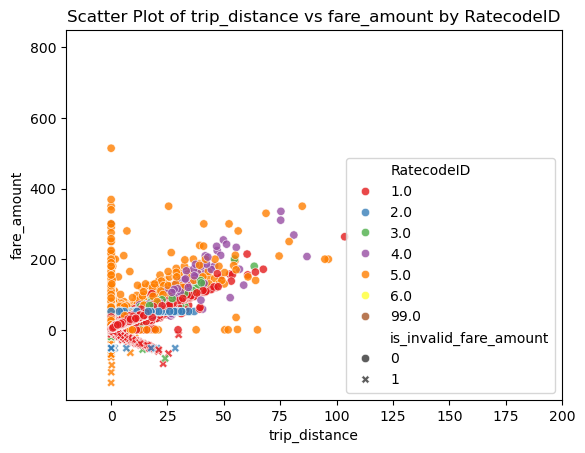

In [20]:
sample_df = df.sample(frac=0.02, random_state=42)

sns.scatterplot(
    data=sample_df,
    x="trip_distance",
    y="fare_amount",
    hue="RatecodeID",
    style="is_invalid_fare_amount",
    palette="Set1",  
    alpha=0.8
)
plt.xlim(-20, 200)
plt.legend(loc="lower right")
plt.title("Scatter Plot of trip_distance vs fare_amount by RatecodeID")
plt.show()

Se observa una relación entre los valores inválidos de `fare_amount` y `trip_distance`.  
Muchos de los registros con `fare_amount` inválido presentan además `RatecodeID` igual a 1.

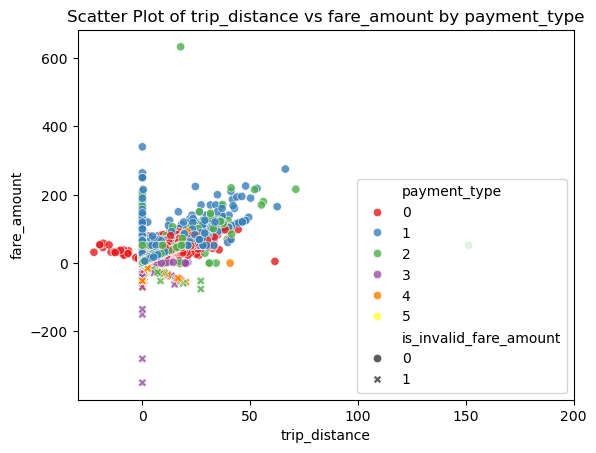

In [21]:
sample_df = df.sample(frac=0.01, random_state=4)

sns.scatterplot(
    data=sample_df,
    x="trip_distance",
    y="fare_amount",
    hue="payment_type",
    style="is_invalid_fare_amount",
    palette="Set1",  
    alpha=0.8
)
plt.xlim(-30, 200)
plt.legend(loc="lower right")
plt.title("Scatter Plot of trip_distance vs fare_amount by payment_type")
plt.show()

Muchos de los registros con `fare_amount` inválido presentan `payment_type` igual a 2 o 4.  
También se observan los `trip_distance` inválidos (que no se veían en el gráfico anterior por tener `RatecodeID = NaN`), los cuales tienden a tener `payment_type` igual a 0.

Se imputan los valores inválidos de `fare_amount` y `trip_distance`.  
Además de esas dos variables, se incluyen como predictores `RatecodeID`, `payment_type`, `PULocationID`, `pickup_hour` y `pickup_month`.  
Las variables `RatecodeID` y `payment_type` muestran una clara relación con los valores inválidos en los gráficos anteriores.  
Las demás se incluyeron por intuición, ya que podrían aportar contexto relevante, aunque no está claro si tienen una relación fuerte.  
Después de la imputación, no se observan valores negativos, lo cual es coherente con el mecanismo del método utilizado.


In [22]:
# 1. Copy the original dataset
df_imputed = df.copy()

# 2. Remove rows where both 'fare_amount' and 'trip_distance' are invalid
df_imputed = df_imputed[~((df_imputed["is_invalid_fare_amount"] == 1) & 
                          (df_imputed["is_invalid_trip_distance"] == 1))]

# 3. Replace invalid values with NaN (for 'fare_amount' and 'trip_distance')
df_imputed["fare_amount"] = df_imputed["fare_amount"].where(df_imputed["is_invalid_fare_amount"] == 0, np.nan)
df_imputed["trip_distance"] = df_imputed["trip_distance"].where(df_imputed["is_invalid_trip_distance"] == 0, np.nan)

# 4. List of columns to impute
cols_to_impute = [
    "fare_amount", "trip_distance", "RatecodeID", "payment_type",
    "PULocationID", "pickup_hour", "pickup_month"
]

# 5. Create the input DataFrame for imputation
df_input = df_imputed[cols_to_impute]

# 6. Apply iterative imputer to the selected columns
imputer = IterativeImputer(random_state=7)
imputed_array = imputer.fit_transform(df_input)

# 7. Replace missing values in 'fare_amount' and 'trip_distance' with the imputed values
# Align the imputed values with the original index using pd.Series

# Replace missing fare_amount
fare_amount_imputed = pd.Series(imputed_array[:, 0], index=df_imputed.index)
df_imputed["fare_amount"] = df_imputed["fare_amount"].fillna(fare_amount_imputed)

# Replace missing trip_distance
trip_distance_imputed = pd.Series(imputed_array[:, 1], index=df_imputed.index)
df_imputed["trip_distance"] = df_imputed["trip_distance"].fillna(trip_distance_imputed)


In [23]:
# Comparison of statistics between original and imputed data
print("Original (con valores inválidos):")
display(df[["fare_amount", "trip_distance"]].describe())

print("\nFinal (con valores imputados):")
display(df_imputed[["fare_amount", "trip_distance"]].describe())

Original (con valores inválidos):


,fare_amount,trip_distance
count,2.464881e+07,2.464881e+07
mean,1.266777e+01,3.527105e+00
std,2.740897e+02,3.250338e+02
min,-1.259000e+03,-3.062000e+01
25%,6.500000e+00,9.900000e-01
50%,9.000000e+00,1.650000e+00
75%,1.400000e+01,3.000000e+00
max,9.983100e+05,3.509149e+05



Final (con valores imputados):


,fare_amount,trip_distance
count,2.464881e+07,2.464881e+07
mean,1.274660e+01,3.528698e+00
std,2.740837e+02,3.250338e+02
min,0.000000e+00,0.000000e+00
25%,6.500000e+00,9.900000e-01
50%,9.000000e+00,1.650000e+00
75%,1.400000e+01,3.000000e+00
max,9.983100e+05,3.509149e+05


### Evaluación del impacto de la imputación de datos inválidos

No se observan **cambios significativos en los estadísticos generales** (media, percentiles, etc.).

In [24]:
# Piso las columnas copiadas del dataset df (invalid_fare_amount y invalid_trip_distance) para que no se confundan con las originales
df_imputed["invalid_fare_amount"] = df_imputed["fare_amount"].apply(lambda x: x if x < 0 else np.nan)
df_imputed["invalid_trip_distance"] = df_imputed["trip_distance"].apply(lambda x: x if x < 0 else np.nan)

df_imputed["is_invalid_fare_amount"] = (df_imputed["fare_amount"] < 0).astype(int)
df_imputed["is_invalid_trip_distance"] = (df_imputed["trip_distance"] < 0).astype(int)

In [25]:
df_imputed.head()  

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,pickup_hour,pickup_day,pickup_weekday,pickup_month,pickup_year,invalid_fare_amount,invalid_trip_distance,is_invalid_fare_amount,is_invalid_trip_distance,has_airport_fee
0,1,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.2,1.0,N,238,239,1,...,0,1,2,1,2020,NaN,NaN,0,0,0
1,1,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.2,1.0,N,239,238,1,...,0,1,2,1,2020,NaN,NaN,0,0,0
2,1,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.6,1.0,N,238,238,1,...,0,1,2,1,2020,NaN,NaN,0,0,0
3,1,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.8,1.0,N,238,151,1,...,0,1,2,1,2020,NaN,NaN,0,0,0
4,2,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.0,1.0,N,193,193,2,...,0,1,2,1,2020,NaN,NaN,0,0,0


In [26]:
print("Cantidad de is_invalid_fare_amount en df_cleaned:")
print(df_imputed["is_invalid_fare_amount"].value_counts())

print("\nCantidad de is_invalid_trip_distance en df_cleaned:")
print(df_imputed["is_invalid_trip_distance"].value_counts())


Cantidad de is_invalid_fare_amount en df_cleaned:
is_invalid_fare_amount
0    24648809
Name: count, dtype: int64

Cantidad de is_invalid_trip_distance en df_cleaned:
is_invalid_trip_distance
0    24648809
Name: count, dtype: int64


In [27]:
(df.isna().sum() / len(df)).sort_values(ascending=False)


airport_fee                 0.999999
invalid_trip_distance       0.999905
invalid_fare_amount         0.996234
passenger_count             0.032860
RatecodeID                  0.032860
store_and_fwd_flag          0.032860
congestion_surcharge        0.032860
VendorID                    0.000000
total_amount                0.000000
is_invalid_trip_distance    0.000000
is_invalid_fare_amount      0.000000
pickup_year                 0.000000
pickup_month                0.000000
pickup_weekday              0.000000
pickup_day                  0.000000
pickup_hour                 0.000000
tolls_amount                0.000000
improvement_surcharge       0.000000
tpep_pickup_datetime        0.000000
tip_amount                  0.000000
mta_tax                     0.000000
extra                       0.000000
fare_amount                 0.000000
payment_type                0.000000
DOLocationID                0.000000
PULocationID                0.000000
trip_distance               0.000000
t

In [28]:
df[df["passenger_count"].isna()][["RatecodeID", "store_and_fwd_flag", "congestion_surcharge"]].isna().sum()

RatecodeID              809967
store_and_fwd_flag      809967
congestion_surcharge    809967
dtype: int64

## Datos faltantes (`NaN`)

Cuando una observación presenta un `NaN` en uno de los features, también presenta NaN en los otros (`passenger_count`, `RatecodeID`, `store_and_fwd_flag` y `congestion_surcharge`). Esto sugiere que la falta de datos podría estar relacionada con un patrón sistemático en los registros, más que con omisiones aleatorias.

In [29]:
df_imputed.loc[:, "missing_group"] = df_imputed["passenger_count"].isna().astype(int)

En este análisis, solo se analizan los viajes con `passenger_count` igual de **NaN**. Los viajes con **passenger_count** igual a cero no se descartan, ya que podría ser que los taxis hayan transportado algún paquete u objeto, en lugar de pasajeros.

Es importante destacar que este tipo de observación merece atención, ya que puede influir en el análisis de los viajes y la utilización de los vehículos.

C:\Users\javier\AppData\Local\Temp\ipykernel_4648\3649550388.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
C:\Users\javier\AppData\Local\Temp\ipykernel_4648\3649550388.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


<Figure size 1200x600 with 0 Axes>

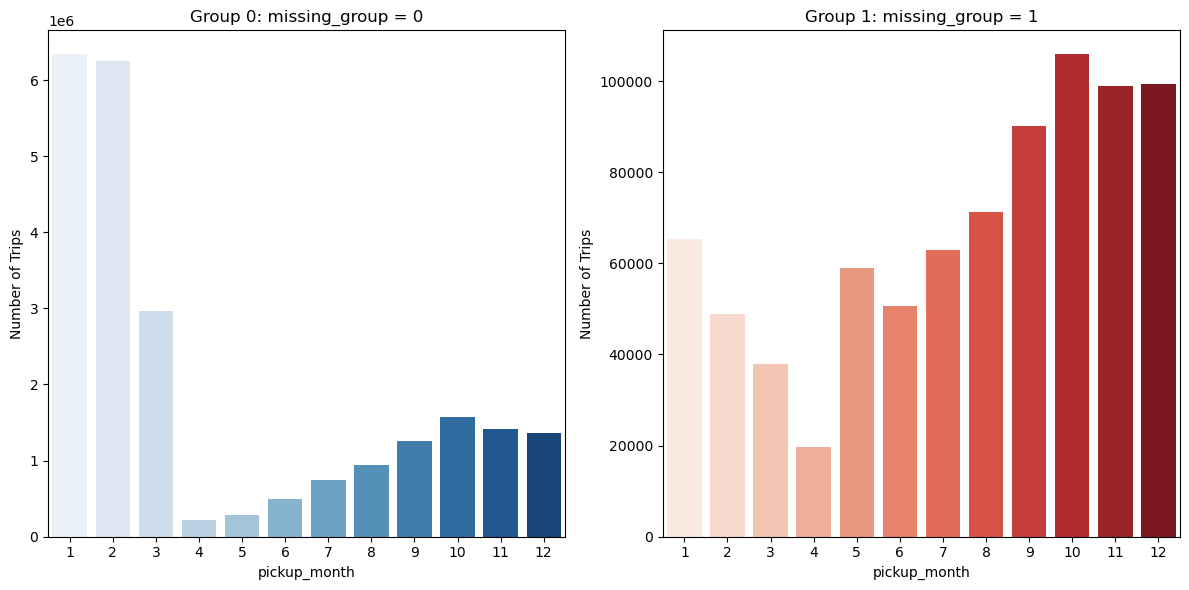

In [30]:
# Create the figure and subplots
plt.figure(figsize=(12, 6))

# Create the figure and subplots
plt.figure(figsize=(12, 6))

# Subplot for group 0
plt.subplot(1, 2, 1)
sns.countplot(
    data=df_imputed[df_imputed["missing_group"] == 0],
    x="pickup_month",
    palette="Blues"
)
plt.title("Group 0: missing_group = 0")
plt.xlabel("pickup_month")
plt.ylabel("Number of Trips")

# Subplot for group 1
plt.subplot(1, 2, 2)
sns.countplot(
    data=df_imputed[df_imputed["missing_group"] == 1],
    x="pickup_month",
    palette="Reds"
)
plt.title("Group 1: missing_group = 1")
plt.xlabel("pickup_month")
plt.ylabel("Number of Trips")

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

## Análisis de los datos faltantes durante la pandemia

A raíz del COVID-19, se observa un aumento en la frecuencia de viajes que pertenecen al grupo `missing_group` (los registros con valores NaN), tanto de manera **absoluta** como **relativa**. Los **features** que presentan datos faltantes incluyen `passenger_count`, `RatecodeID`, `store_and_fwd_flag` y `congestion_surcharge`. 

Esto sugiere que por alguna razón, estos valores podrían no haberse registrado correctamente, o incluso podrían haberse **ocultado intencionalmente**. Algunas posibles explicaciones son:
- El **número de pasajeros** podría haber excedido el límite permitido para ciertos viajes, lo que podría haber llevado a su omisión por cuestiones **legales** o **normativas**. Es posible que en estos casos, el registro del `passenger_count` se haya omitido para evitar problemas con las regulaciones.
- Las **zonas de los viajes** (`RatecodeID`) podrían no haber sido permitidas debido a las **restricciones de movilidad** o **bloqueos geográficos** durante la pandemia, lo que podría haber llevado a su omisión en los registros por razones **legales** o **normativas**.
- El **`congestion_surcharge`** podría no haber tenido sentido en el contexto de la pandemia, especialmente si el tráfico era significativamente menor, lo que llevó a su omisión en los registros.

Estos datos faltantes pueden clasificarse como **MNCAR (Missing Not at Random)**, ya que la falta de información en ciertas columnas (como `passenger_count`, `RatecodeID`, `congestion_surcharge`) está probablemente asociada con condiciones observables y externas, tales como restricciones legales, normativas o variaciones en las condiciones operativas durante la pandemia.


In [31]:
# Time in minutes
df_imputed.loc[:, "trip_duration"] = (df_imputed['tpep_dropoff_datetime'] - df_imputed['tpep_pickup_datetime']).dt.total_seconds() / 60

df_imputed.groupby("missing_group")[["fare_amount", "trip_distance", "trip_duration"]].describe()


fare_amount                                                   \
                    count       mean         std  min    25%    50%    75%   
missing_group                                                                
0              23838845.0  12.215509  278.670158  0.0   6.50   9.00  13.50   
1                809964.0  28.377725   15.921726  0.0  16.33  25.45  37.78   

                         trip_distance             ...                    \
                     max         count       mean  ...    75%        max   
missing_group                                      ...                     
0              998310.03    23838845.0   2.747080  ...   2.88  167329.45   
1                 280.00      809964.0  26.533255  ...  11.00  350914.89   

              trip_duration                                                   \
                      count       mean         std            min        25%   
missing_group                                                                  
0                23838845.0  15.232042  165.609312 -531231.233333   6.116667   
1                  809964.0  24.035924   17.274721     -24.483333  12.000000   

                                                  
                     50%        75%          max  
missing_group                                     
0              10.066667  16.116667  8525.116667  
1              21.000000  32.283333  2639.450000  

[2 rows x 24 columns]

## Análisis de los viajes durante la pandemia: Comparación entre grupos con y sin datos faltantes

### Comparación de estadísticas

#### 1. **fare_amount**
- **Grupo 0 (sin datos faltantes)**:
  - Promedio: 12.21
  - Desviación estándar: 278.67
  - La mayoría de los viajes son cortos, pero existen algunos con tarifas muy altas, posiblemente debido a viajes largos (y/o tiempos de viaje largos).

- **Grupo 1 (con datos faltantes)**:
  - Promedio: 28.38
  - Desviación estándar: 15.92
  - En este grupo, la tarifa promedio es considerablemente más alta y la desviación estándar es mucho más baja. Esto sugiere que los viajes con datos faltantes son más homogéneos en términos de tarifa, con menos variabilidad. Las personas recorrian mayores distancia, pero posiblemente con menos variabilidad en los tiempos empleados. 

#### 2. **trip_distance (Distancia del viaje)**
- **Grupo 0 (sin datos faltantes)**:
  - Promedio: 2.75 millas
  - Desviación estándar: 44.07 millas
  - La mayoría de los viajes son relativamente cortos, pero también existen algunos casos extremos con distancias mayores.

- **Grupo 1 (con datos faltantes)**:
  - Promedio: 26.53 millas
  - Desviación estándar: 1776.89 millas
  - La distancia promedio es mucho mayor en este grupo, lo que sugiere que los viajes con datos faltantes son, en su mayoría, viajes largos (debido a problemas de movilidad relacionados al COVID-19). Sin embargo, la desviación estándar extremadamente alta indica que podría haber errores en los registros o que algunos viajes extremadamente largos están sesgando los resultados.

#### 3. **trip_duration (Duración del viaje)**
- **Grupo 0 (sin datos faltantes)**:
  - Promedio: 15.23 minutos
  - Desviación estándar: 165.61 minutos
  - Los tiempos de viaje son bastante variables, con algunos viajes extremadamente largos.

- **Grupo 1 (con datos faltantes)**:
  - Promedio: 24.04 minutos
  - Desviación estándar: 17.27 minutos
  - El tiempo de viaje en este grupo es más homogéneo y presenta un promedio más alto, lo que podría reflejar trayectos más largos durante la pandemia, posiblemente debido a restricciones de movilidad y menor congestión vehicular en la ciudad.

In [32]:
grup_0 = df_imputed[df_imputed["missing_group"] == 0][["fare_amount", "trip_distance", "trip_duration"]]
grup_1 = df_imputed[df_imputed["missing_group"] == 1][["fare_amount", "trip_distance", "trip_duration"]]

variables = ["fare_amount", "trip_distance", "trip_duration"]

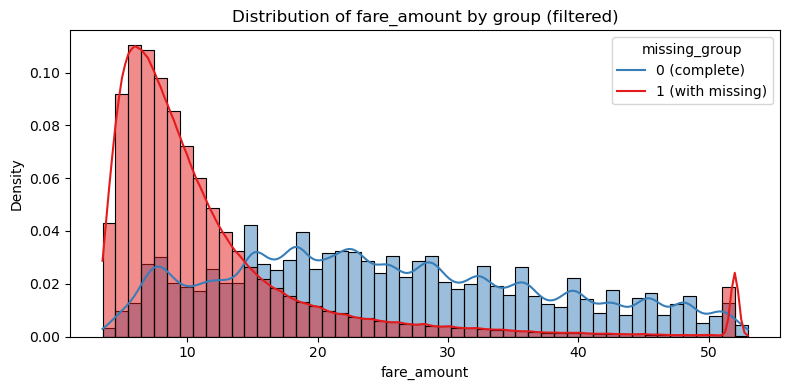

In [33]:
var = variables[0]

# Filter to remove extreme outliers (1st and 99th percentiles)
p1, p99 = df_imputed[var].quantile([0.01, 0.99])
subset = df_imputed[(df_imputed[var] >= p1) & (df_imputed[var] <= p99)]

# Plot
plt.figure(figsize=(8, 4))
sns.histplot(
    data=subset,
    x=var,
    hue="missing_group",
    kde=True,
    stat="density",
    common_norm=False,
    bins=50,
    palette="Set1"
)

plt.title(f"Distribution of {var} by group (filtered)")
plt.xlabel(var)
plt.ylabel("Density")
plt.legend(title="missing_group", labels=["0 (complete)", "1 (with missing)"])
plt.tight_layout()
plt.show()


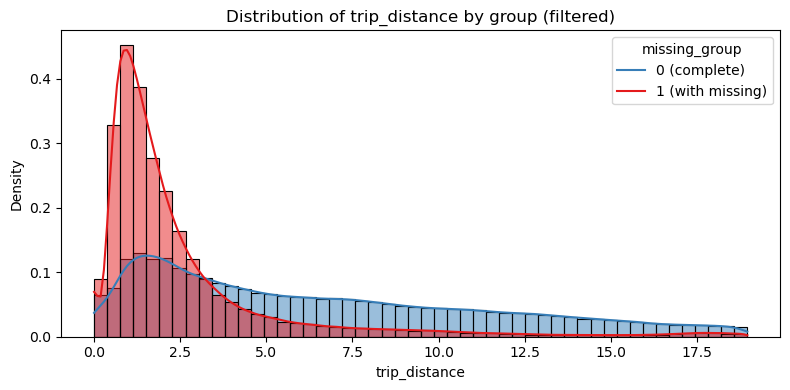

In [34]:
var = variables[1]

# Filter to avoid extreme outliers (1st and 99th percentiles)
p1, p99 = df_imputed[var].quantile([0.01, 0.99])
subset = df_imputed[(df_imputed[var] >= p1) & (df_imputed[var] <= p99)]

# Plot
plt.figure(figsize=(8, 4))
sns.histplot(
    data=subset,
    x=var,
    hue="missing_group",
    kde=True,
    stat="density",
    common_norm=False,
    bins=50,
    palette="Set1"
)

plt.title(f"Distribution of {var} by group (filtered)")
plt.xlabel(var)
plt.ylabel("Density")
plt.legend(title="missing_group", labels=["0 (complete)", "1 (with missing)"])
plt.tight_layout()
plt.show()

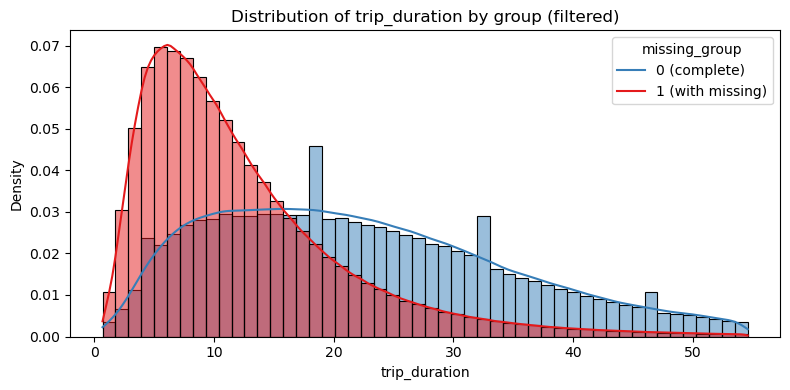

In [35]:
var = variables[2]

# Filter to avoid extreme outliers (1st and 99th percentiles)
p1, p99 = df_imputed[var].quantile([0.01, 0.99])
subset = df_imputed[(df_imputed[var] >= p1) & (df_imputed[var] <= p99)]

# Plot
plt.figure(figsize=(8, 4))
sns.histplot(
    data=subset,
    x=var,
    hue="missing_group",
    kde=True,
    stat="density",
    common_norm=False,
    bins=50,
    palette="Set1"
)

plt.title(f"Distribution of {var} by group (filtered)")
plt.xlabel(var)
plt.ylabel("Density")
plt.legend(title="missing_group", labels=["0 (complete)", "1 (with missing)"])
plt.tight_layout()
plt.show()

### Test U de Mann-Whitney

In [36]:
# Mann-Whitney U Test
# No es necesario pedir datos distribuidos de forma normal
print("--- Mann-Whitney U Test ---")
print("Hipótesis nula (H0): Las distribuciones de los dos grupos son iguales.")
print("Hipótesis no nula (H1): Las distribuciones de los dos grupos son diferentes. \n")

# Hipótesis:
# H0: Las distribuciones de los dos grupos son iguales.
# H1: Las distribuciones de los dos grupos son diferentes.

for var in variables:
    # Aplicar Mann-Whitney U para cada variable
    u_stat, p_value = stats.mannwhitneyu(grup_0[var], grup_1[var], alternative='two-sided')
    
    print(f"Variable: {var}")
    print(f"  U-statistic = {u_stat:.3f}, p-value = {p_value:.6f}")
    
    if p_value < 0.05:
        print("Se rechaza H0: Diferencia significativa entre los grupos\n")
    else:
        print("No se rechaza H0: No hay diferencia significativa entre los grupos\n")

--- Mann-Whitney U Test ---
Hipótesis nula (H0): Las distribuciones de los dos grupos son iguales.
Hipótesis no nula (H1): Las distribuciones de los dos grupos son diferentes. 

Variable: fare_amount
  U-statistic = 2953232719971.500, p-value = 0.000000
Se rechaza H0: Diferencia significativa entre los grupos

Variable: trip_distance
  U-statistic = 4215068642346.500, p-value = 0.000000
Se rechaza H0: Diferencia significativa entre los grupos

Variable: trip_duration
  U-statistic = 5043314624323.500, p-value = 0.000000
Se rechaza H0: Diferencia significativa entre los grupos



En el test **Mann-Whitney U**, no se asume un estimador específico, y se comparan las muestras de forma no paramétrica, analizando las distribuciones sin suponer normalidad. Dado que para las variables `fare_amount`, `trip_distance` y `trip_duration` se rechaza la hipótesis nula, se concluye que para ninguna de estas variables las muestras provienen de la misma población.

# Preguntas sugeridas
## ¿Cuáles son los patrones de demanda a lo largo del tiempo?

### Análisis de la Actividad de los Viajes en Taxi por Hora

C:\Users\javier\AppData\Local\Temp\ipykernel_4648\2681916834.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_imputed.groupby("pickup_hour").size().plot(


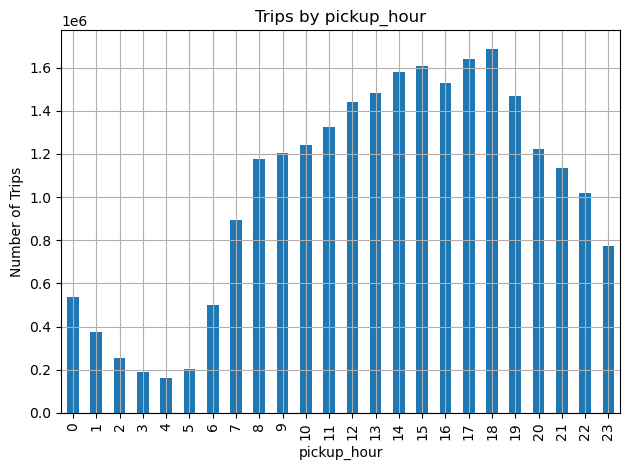

In [37]:
# Trip count by pickup_hour
df_imputed.groupby("pickup_hour").size().plot(
    kind="bar", 
    title="Trips by pickup_hour"
)
plt.xlabel("pickup_hour")
plt.ylabel("Number of Trips")
plt.grid(True)
plt.tight_layout()
plt.show()

Como es de esperar, se observa poca actividad durante las horas de la madrugada. La demanda aumenta cuando las personas se dirigen al trabajo, se mantiene alta durante el día con un pico alrededor de las 18:00 horas. A partir de esa hora, que es cuando la gente sale del trabajo, la actividad empieza a decaer.

### Análisis de la Actividad de los Viajes en Taxi por Día de la Semana

C:\Users\javier\AppData\Local\Temp\ipykernel_4648\2926486065.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  heatmap_data = df_imputed.groupby(["pickup_weekday", "pickup_hour"]).size().unstack()


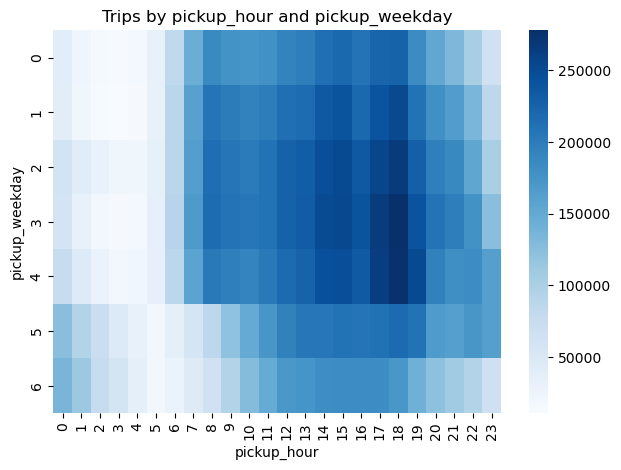

In [38]:
# Heatmap: pickup_hour vs pickup_weekday
heatmap_data = df_imputed.groupby(["pickup_weekday", "pickup_hour"]).size().unstack()

sns.heatmap(heatmap_data, cmap="Blues")
plt.title("Trips by pickup_hour and pickup_weekday")
plt.xlabel("pickup_hour")
plt.ylabel("pickup_weekday")
plt.tight_layout()
plt.show()


Respecto de los días de la semana, con el **heatmap** se observa que durante todos los días de lunes a viernes hay un comportamiento muy parecido en cuanto al uso máximo de taxis. Sin embargo, la **frecuencia de uso se incrementa gradualmente de un día a otro**, alcanzando la máxima actividad el **viernes**. Esto sugiere que a las 18:00 horas, que es cuando parece alcanzarse el pico de uso para todos los días, la **frecuencia aumenta a medida que avanzan los días de la semana**, probablemente debido a reuniones sociales y salidas el viernes por la tarde.

Durante los fines de semana, la actividad cae considerablemente. Sin embargo, se observa que la gente usa más taxis en las horas de la madrugada, comparado con los días de semana, y también hay una buena demanda de taxis de 12:00 a 18:00 horas aproximadamente.


### Análisis de la Actividad de los Viajes en Taxi por Mes

C:\Users\javier\AppData\Local\Temp\ipykernel_4648\3977007114.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_imputed.groupby("pickup_month").size().plot(kind="bar", title="Trips by pickup_month")


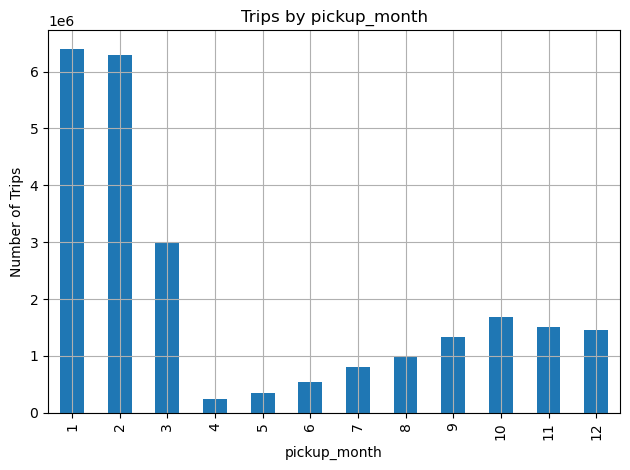

In [39]:
# Trips by month
df_imputed.groupby("pickup_month").size().plot(kind="bar", title="Trips by pickup_month")
plt.xlabel("pickup_month")
plt.ylabel("Number of Trips")
plt.grid(True)
plt.tight_layout()
plt.show()


Se observa que hay **gran actividad** en los primeros dos meses. Sin embargo, debido al impacto del COVID-19, el **mes 3** ya presenta una **caída considerable** en el uso del servicio de taxis. Esta caída se acentúa en el **mes 4**, donde se alcanza el **mínimo de uso**, probablemente asociado al **máximo confinamiento** en Estados Unidos.

A partir del mes 4, se comienza a ver un **aumento gradual** en la actividad a medida que la situación se va normalizando, aunque el nivel de uso no llega a los valores iniciales. En el **mes 10**, el número de viajes es mayor que en los **meses 11 y 12**, lo que probablemente también esté relacionado con las **restricciones de circulación**.

### Análisis de la Actividad de Viajes por Día y Mes

C:\Users\javier\AppData\Local\Temp\ipykernel_4648\3228562219.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  heatmap_month_day = df_imputed.groupby(["pickup_month", "pickup_day"]).size().unstack()


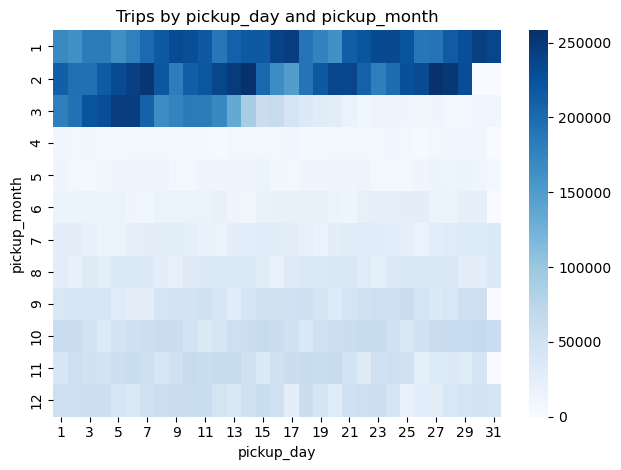

In [40]:
# Heatmap: day vs. month (daily activity by month)
heatmap_month_day = df_imputed.groupby(["pickup_month", "pickup_day"]).size().unstack()
sns.heatmap(heatmap_month_day, cmap="Blues")
plt.title("Trips by pickup_day and pickup_month")
plt.xlabel("pickup_day")
plt.ylabel("pickup_month")
plt.tight_layout()
plt.show()


Se aprecia claramente la **restricción de COVID-19** a partir de la mitad del **mes 3**, con una **caída considerable** en la actividad, lo cual está en línea con el gráfico **Trips by pickup_mont**. Tanto antes como después de esta caída, se observan **días de mayor actividad**, posiblemente correspondientes a los **días viernes**. Posteriormente, los **fines de semana** muestran una **caída en la actividad**, lo que sugiere un comportamiento más moderado durante esos días.


## ¿Cómo varía la distancia de los viajes según el tipo de servicio?

C:\Users\javier\AppData\Local\Temp\ipykernel_4648\578398593.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


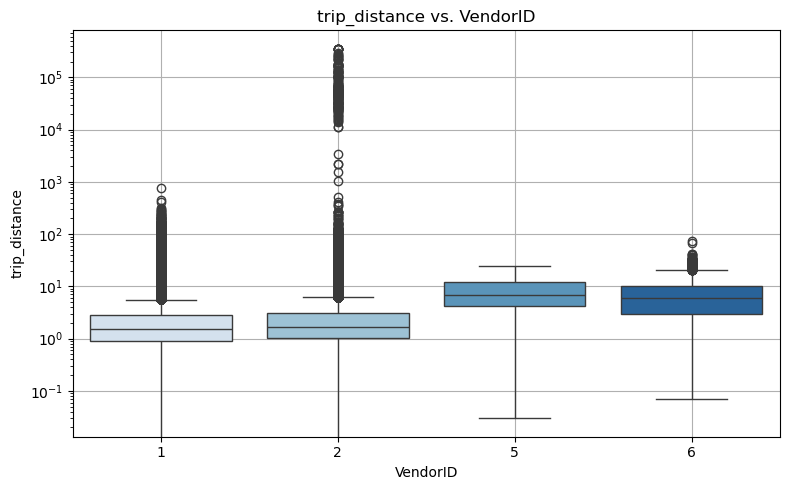

In [41]:
plt.figure(figsize=(8, 5))
sns.boxplot(
    data=df_imputed, 
    x="VendorID", 
    y="trip_distance", 
    palette="Blues"
)

plt.yscale("log")
plt.title("trip_distance vs. VendorID")
plt.xlabel("VendorID")
plt.ylabel("trip_distance")
plt.grid(True)
plt.tight_layout()
plt.show()

- A partir del **análisis gráfico mediante diagramas de cajas**, se observa la presencia de **valores atípicos extremos** en algunos `VendorID`.  
- Esto sugiere que **algunos vendors podrían operar en zonas lejanas o menos accesibles**, donde los viajes son considerablemente más largos.  
- Es posible que ciertos **vendors** tengan **acuerdos específicos o exclusividad** para **operar en determinadas zonas**, registrando **distancias más largas**. Esto podría deberse tanto al **COVID-19** como a la **logística** de las empresas, que operan en áreas más alejadas o menos accesibles.
- En contraste, otros **vendors** presentan distribuciones más compactas, lo que indicaría que **sus viajes se concentran principalmente en zonas urbanas o de corta distancia**, con menos variabilidad en las distancias recorridas.

In [42]:
df_imputed.groupby("VendorID", observed=True)["trip_distance"].describe()

,count,mean,std,min,25%,50%,75%,max
VendorID,,,,,,,,
1,8004823.0,2.578601,3.365619,0.00,0.9000,1.50,2.80,766.50
2,16598761.0,3.976897,396.077399,0.00,1.0100,1.70,3.13,350914.89
5,128.0,8.378516,5.226145,0.03,4.2275,6.90,12.37,24.14
6,45097.0,7.191493,5.260246,0.07,2.9800,5.91,10.18,73.43


- El **VendorID 2** presenta mayor cantidad de viajes (~16M) comparado con VendorID 1 (~8M).  
- La **media** de `trip_distance` es mayor en VendorID 2 (3.98) frente a VendorID 1 (2.58), pero la **mediana** es muy similar en ambos (~1.6).  
- La **dispersión** es considerablemente mayor en VendorID 2 (`std` = 396) frente a VendorID 1 (`std` = 3.37), indicando **valores atípicos extremos**.  
- Los **VendorID 5 y 6** tienen mucha menor cantidad de viajes registrados (128 y ~45k, respectivamente), pero sus **medias de distancia son bastante más altas** (8.38 y 7.19), lo que sugiere un comportamiento distinto.  
- Además, sus **rangos intercuartílicos y máximos** son mucho mayores, lo que refuerza la idea de que operan en contextos diferentes o con tipos de viajes más largos.  
- Del **análisis descriptivo** y los **diagramas de cajas**, se observan diferencias claras entre los grupos. Para reforzar esta observación, se aplica el test de **Kruskal-Wallis**, una prueba no paramétrica que compara las distribuciones de los grupos sin asumir normalidad en los datos. Su aplicación es especialmente adecuada dado el **gran volumen de datos disponibles**.

### Test de Kruskal-Wallis

In [43]:
# Kruskal-Wallis
# No es necesario pedir datos distribuidos de forma normal
df_kruskal = df_imputed.dropna(subset=["VendorID", "trip_distance"])

# Aplicar Kruskal-Wallis
resultado_kruskal = pg.kruskal(dv='trip_distance', between='VendorID', data=df_kruskal)

# Extraer valores relevantes
h_value = resultado_kruskal['H'].values[0]
p_value_kruskal = resultado_kruskal['p-unc'].values[0]

# Hipótesis:
# H0: Las distribuciones de trip_distance son iguales entre los grupos de VendorID.
# H1: Al menos uno de los grupos tiene una distribución distinta.

print("--- Kruskal-Wallis Test ---")
print("Hipótesis nula (H0): Las distribuciones de trip_distance son iguales entre los grupos de VendorID.")
print("Hipótesis no nula (H1): Al menos un grupo tiene una distribución distinta.")
print(f"Resultado: H = {h_value:.3f}, p = {p_value_kruskal:.5f} \n")

if p_value_kruskal < 0.05:
    print("Se rechaza H0. Hay diferencias significativas entre los grupos.")
else:
    print("No se rechaza H0. No hay evidencia suficiente de diferencias entre los grupos.")

--- Kruskal-Wallis Test ---
Hipótesis nula (H0): Las distribuciones de trip_distance son iguales entre los grupos de VendorID.
Hipótesis no nula (H1): Al menos un grupo tiene una distribución distinta.
Resultado: H = 140359.791, p = 0.00000 

Se rechaza H0. Hay diferencias significativas entre los grupos.


En el test no paramétrico de **Kruskal-Wallis**, se observa que **existe al menos un grupo con una distribución significativamente diferente** al resto. Este test **confirma la presencia de diferencias sin necesidad de suponer normalidad**, lo que refuerza la conclusión de que hay diferencias reales entre los grupos.

## ¿Cuáles son las zonas con mayor actividad de pick-ups y drop-offs?

**Zonas con mayor actividad de pick-ups y drop-offs**

Para identificar las zonas con más actividad, se puede agrupar por zonas de pick-up y drop-off, y luego contar la cantidad de viajes en cada una. Las zonas con mayor frecuencia son las de mayor actividad. También se pueden visualizar en un mapa de calor para mayor claridad.

Top 10 zones with the most pick up activity:
PULocationID
237    1145404
236    1089576
161     946850
186     862318
162     831585
170     754592
142     747174
48      730144
239     704011
141     688200
Name: count, dtype: int64

Top 10 zones with the most drop off activity:
DOLocationID
236    1126413
237    1015495
161     843730
170     738633
141     686807
142     670968
239     667834
162     666190
48      640781
238     608214
Name: count, dtype: int64


C:\Users\javier\AppData\Local\Temp\ipykernel_4648\2898336653.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


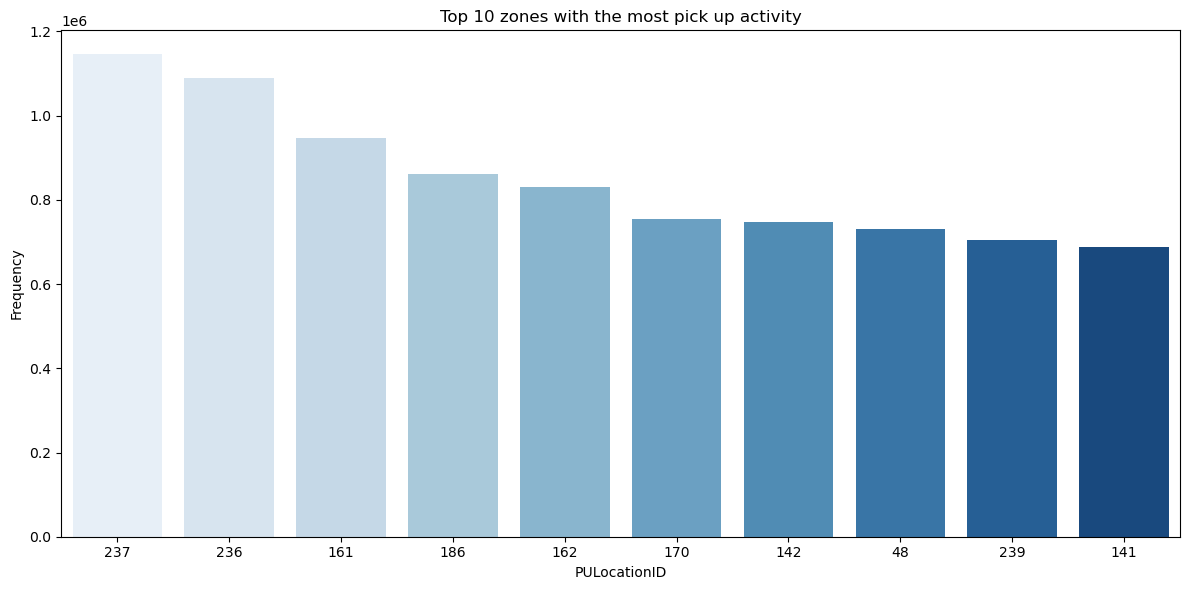

C:\Users\javier\AppData\Local\Temp\ipykernel_4648\2898336653.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


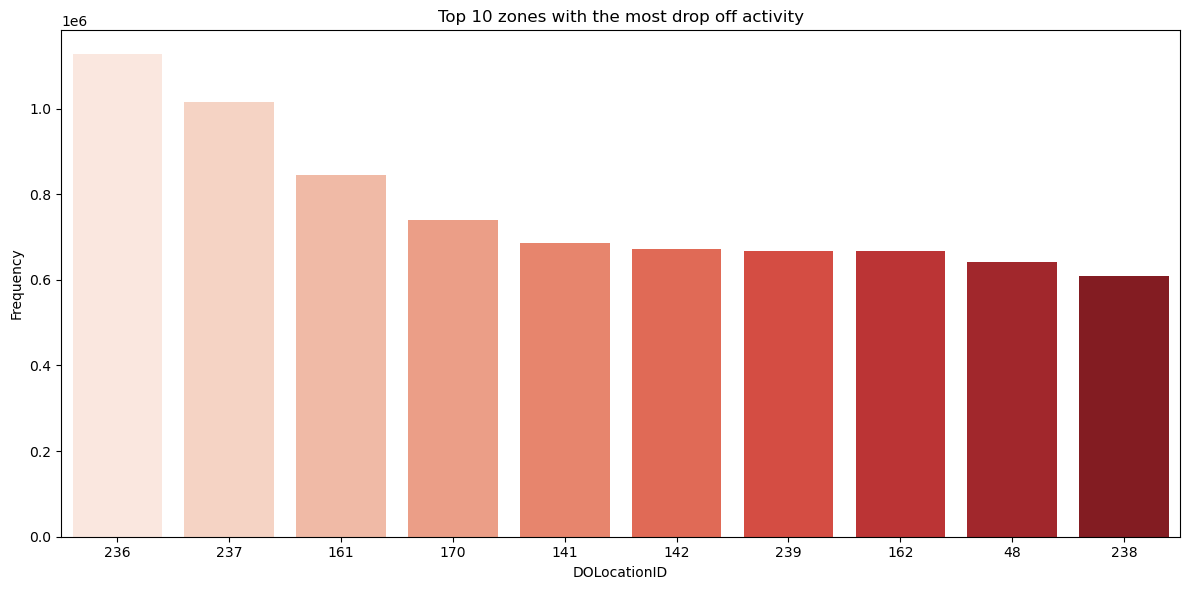

In [44]:
# Contar la frecuencia de cada zona en pick-ups y drop-offs
pickup_counts = df['PULocationID'].value_counts()
dropoff_counts = df['DOLocationID'].value_counts()

# Identificar las zonas con mayor actividad
top_pickup_zones = pickup_counts.head(10)
top_dropoff_zones = dropoff_counts.head(10)

top_pickup_zones.index = top_pickup_zones.index.astype(str)
top_dropoff_zones.index = top_dropoff_zones.index.astype(str)

print("Top 10 zones with the most pick up activity:")
print(top_pickup_zones)

print("\nTop 10 zones with the most drop off activity:")
print(top_dropoff_zones)

# Primer gráfico: Pick-Ups
plt.figure(figsize=(12, 6))
sns.barplot(
    x=top_pickup_zones.index,
    y=top_pickup_zones.values,
    palette=sns.color_palette("Blues", len(top_pickup_zones))
)
plt.title("Top 10 zones with the most pick up activity")
plt.xlabel("PULocationID")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# Segundo gráfico: Drop-Offs
plt.figure(figsize=(12, 6))
sns.barplot(
    x=top_dropoff_zones.index,
    y=top_dropoff_zones.values,
    palette=sns.color_palette("Reds", len(top_dropoff_zones))
)
plt.title("Top 10 zones with the most drop off activity")
plt.xlabel("DOLocationID")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

**Hallazgos:**  
- Las zonas 238 y 237 dominan con ~1.5M viajes cada una ambos rankings (posiblemente aeropuertos o centros de transporte)  
- 6 de las 10 zonas principales coinciden en pick-up y drop-off (48, 141, 142, 161, 170, 238).

Limpieza y transformación:
- Eliminados 412 registros con trip_distance < 0 y RatecodeID faltante.
- Codificación de store_and_fwd_flag a binario (Y=1, N=0).

## ¿Cómo varían las tarifas según la distancia y el tipo de servicio?


**Variación de tarifas según la distancia y el tipo de servicio**

La relación entre la tarifa y la distancia generalmente es positiva: a mayor distancia, mayor tarifa. Sin embargo, el tipo de servicio influye significativamente. Se puede analizar con un gráfico de dispersión (scatter plot) con color por tipo de servicio, o usando regresiones.

C:\Users\javier\AppData\Local\Temp\ipykernel_4648\2517520758.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ratecode_tarifas = df_imputed.groupby('RatecodeID')['fare_amount'].mean().sort_values()


Average fare by ratecode ID:
RatecodeID
1.0      11.124407
6.0      29.041407
2.0      51.505537
5.0      53.599892
3.0      62.563744
4.0      73.184803
99.0    390.010587
Name: fare_amount, dtype: float64


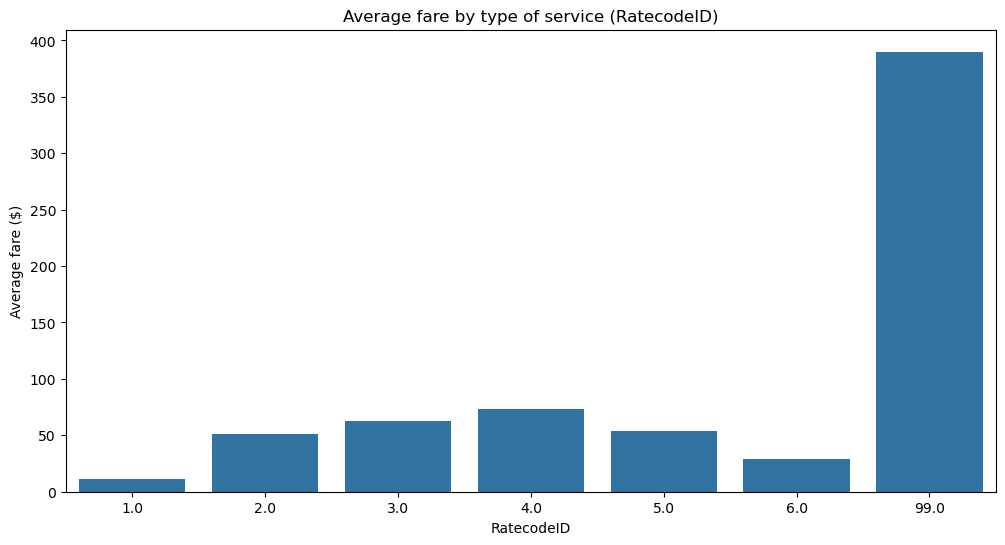

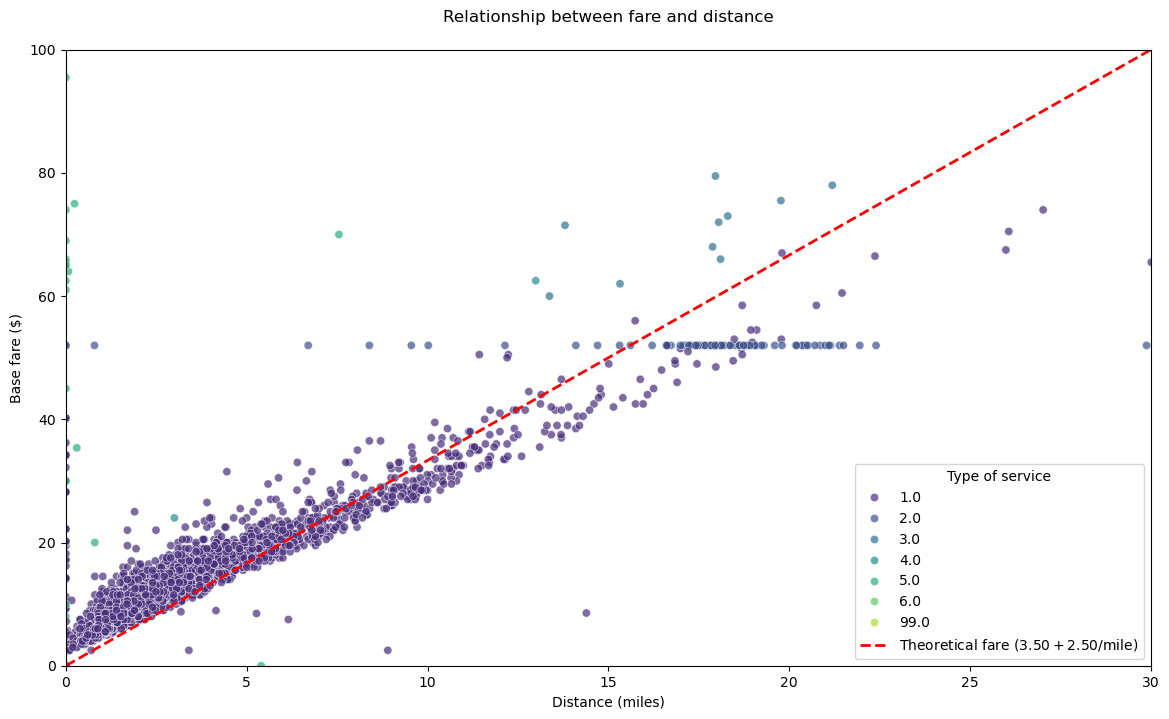

In [45]:
# Relación entre distancia y tarifa base (fare_amount)
"""sns.scatterplot(
    data=df_imputed,
    x="trip_distance",
    y="fare_amount",
    hue="VendorID",
    palette="viridis",  
    alpha=0.8
)
plt.xscale("log")
plt.yscale("log")
plt.legend(loc="lower right")
plt.show()"""

# Analizar tarifas por tipo de servicio (RatecodeID)
ratecode_tarifas = df_imputed.groupby('RatecodeID')['fare_amount'].mean().sort_values()
print("Average fare by ratecode ID:")
print(ratecode_tarifas)

# Graficar tarifas promedio por RatecodeID
plt.figure(figsize=(12, 6))
sns.barplot(x=ratecode_tarifas.index, y=ratecode_tarifas.values)
plt.title("Average fare by type of service (RatecodeID)")
plt.xlabel("RatecodeID")
plt.ylabel("Average fare ($)")
plt.show()

# %%
# Muestra estratificada para mejor visualización
sample_df = df_imputed.sample(5000, random_state=42)

plt.figure(figsize=(14, 8))
sns.scatterplot(x='trip_distance', y='fare_amount', data=sample_df, 
                hue='RatecodeID', palette="viridis", alpha=0.7)
plt.plot([0, 30], [0, 100], 'r--', lw=2, label='Theoretical fare ($3.50 + $2.50/mile)')
plt.title('Relationship between fare and distance', pad=20)
plt.xlabel('Distance (miles)')
plt.ylabel('Base fare ($)')
plt.legend(title='Type of service')
plt.xlim(0, 30)
plt.ylim(0, 100)
plt.show()


**Variación de tarifas según la distancia y el tipo de servicio**

En el primer gráfico se ven las tarifas promedio agrupadas por RatecodeID:
- RatecodeID 1.0 (Tarifa estándar): Alrededor de 10 USD, representa la tarifa básica para viajes regulares dentro de la ciudad
- RatecodeID 2.0 (JFK Airport): Alrededor de 50 USD, refleja la tarifa fija establecida para viajes hacia/desde el aeropuerto JFK
- RatecodeID 3.0 (Newark Airport): Alrededor de 60 USD, tarifa especial para viajes hacia/desde Newark
- RatecodeID 4.0 (Nassau/Westchester): Alrededor de 70 USD, la tarifa más alta entre servicios regulares
- RatecodeID 5.0 (Tarifa negociada): Alrededor de 50 USD, para acuerdos especiales
- RatecodeID 6.0 (Viaje compartido): Alrededor de 30 USD, más económico que los servicios individuales
- RatecodeID 99.0 (Anomalías): Alrededor de 390 USD, valor extremadamente alto que sugiere casos atípicos o errores

La variación significativa entre categorías demuestra cómo los diferentes tipos de servicio siguen estructuras de precios completamente distintas, independientemente de la distancia recorrida.

En el segundo gráfico se ve la relación entre distancia y tarifa:

- Línea teórica (roja punteada): Representa la tarifa calculada con la fórmula estándar (2.50 USD + 0.50 USD / milla)
- Servicio estándar (RatecodeID 1.0, puntos morados): Sigue aproximadamente la línea teórica, muestra una relación lineal clara entre distancia y tarifa, presenta variabilidad causada por tiempo de espera, tráfico y otros factores

- Tarifas fijas (RatecodeID 2.0, puntos azules): Forma una "línea horizontal" alrededor de 50 USD independientemente de la distancia, confirma la política de tarifa plana para viajes al aeropuerto JFK

- Servicios especiales (RatecodeID 3.0, 4.0, 5.0): Tienden a situarse por encima de la línea teórica, muestran mayor dispersión, indicando estructuras tarifarias más variables

**Implicaciones analíticas**

- Predicción de tarifas: Un modelo único no puede predecir adecuadamente todas las tarifas; se requieren modelos específicos por tipo de servicio
- Detección de anomalías: Viajes que caen significativamente fuera de su patrón esperado (por ejemplo, viajes estándar muy por encima de la línea teórica) pueden indicar errores de registro o prácticas tarifarias cuestionables
- Optimización de rutas: Los servicios con tarifas fijas (como JFK) eliminan el incentivo para rutas más largas, mientras que los servicios estándar mantienen una relación directa entre distancia y costo

## ¿Se pueden detectar patrones de fraude o comportamiento anómalo en los datos de viajes? (ejemplo viajes con distancias extremadamente cortas pero tarifas altas)

**Detección de patrones de fraude o comportamiento anómalo**

Una forma de detectar anomalías es filtrar los viajes con distancias muy cortas pero tarifas desproporcionadamente altas. También se pueden usar métodos estadísticos o de machine learning como aislamiento de outliers (Isolation Forest, DBSCAN, etc.).

Short trips with high fares:
          trip_distance  fare_amount  PULocationID  DOLocationID
189                0.80        22.50           170           107
473                0.00        26.20           166           211
646                0.00        39.20            17           108
699                0.00        52.00           236            43
1306               0.00        45.00           265           265
...                 ...          ...           ...           ...
24648894           0.52        26.81            36            36
24648898           0.39        47.19            81            51
24649054           0.00        30.20           158           127
24649059           0.10        23.56           107           107
24649068           0.40        45.65            61            61

[180385 rows x 4 columns]

Circular trips detected:
          trip_distance  fare_amount  PULocationID  DOLocationID
2                  0.60         6.00           238           238
4       

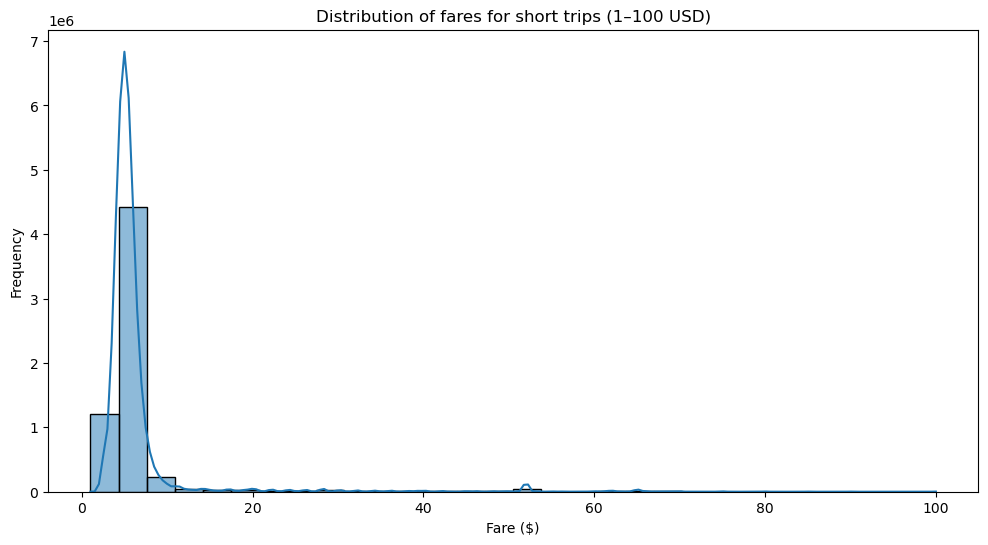

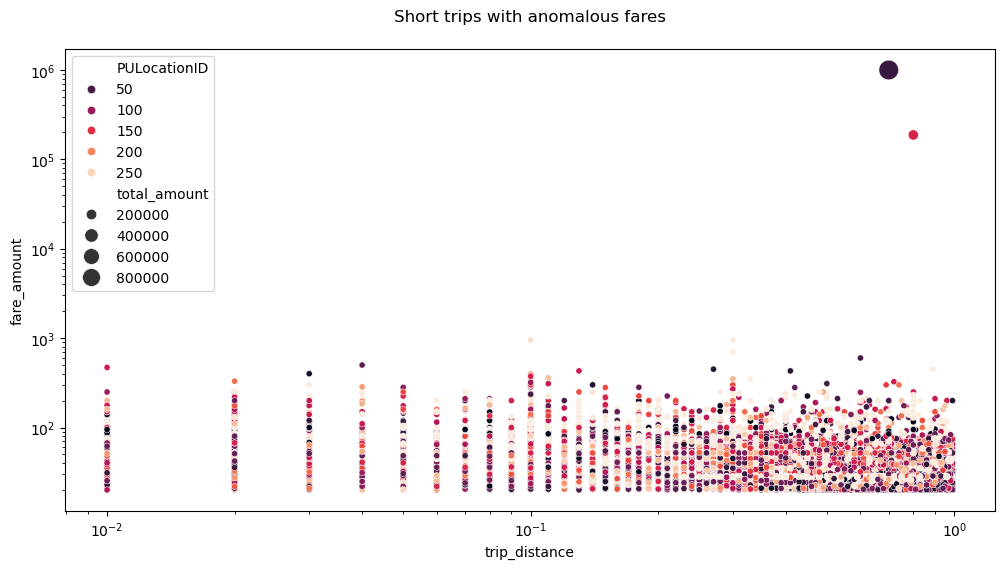

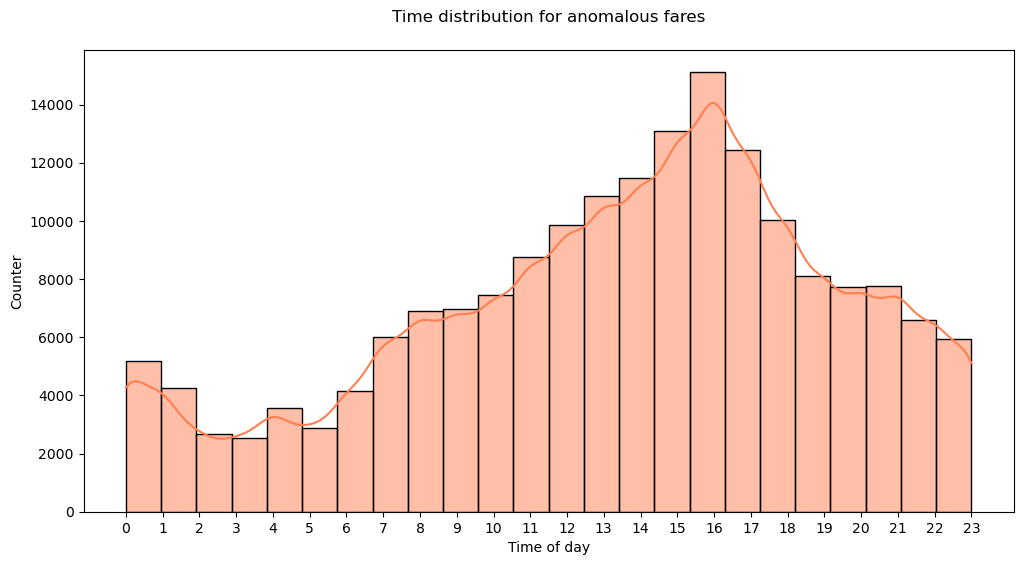

In [46]:
df_imputed = df.copy()

if df_imputed['PULocationID'].dtype.name == 'category':
    df_imputed['PULocationID'] = df_imputed['PULocationID'].astype(int)
if df_imputed['DOLocationID'].dtype.name == 'category':
    df_imputed['DOLocationID'] = df_imputed['DOLocationID'].astype(int)
    
anomalous_trips = df_imputed[
    (df_imputed['trip_distance'] < 1) & 
    (df_imputed['fare_amount'] > 20)  # Error tipográfico corregido
].copy()  # <--- ¡Copia explícita!

print("Short trips with high fares:")
print(anomalous_trips[['trip_distance', 'fare_amount', 'PULocationID', 'DOLocationID']])

# Detectar viajes circulares (CORREGIDO)
circular_trips = df_imputed[
    df_imputed['PULocationID'] == df_imputed['DOLocationID']
].copy()  # <--- ¡Copia explícita!

print("\nCircular trips detected:")
print(circular_trips[['trip_distance', 'fare_amount', 'PULocationID', 'DOLocationID']])

# Graficar distribución de tarifas para viajes cortos (<1 milla)
short_trips = df_imputed[df_imputed['trip_distance'] < 1]

# Filter valid fares
valid_short_trips = short_trips[short_trips['fare_amount'].between(1, 100)]

plt.figure(figsize=(12, 6))
sns.histplot(valid_short_trips['fare_amount'], bins=30, kde=True)
plt.title("Distribution of fares for short trips (1–100 USD)")
plt.xlabel("Fare ($)")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(12, 6))
sns.scatterplot(
    x='trip_distance',
    y='fare_amount',
    data=anomalous_trips,
    hue='PULocationID',
    palette="rocket",
    size='total_amount',
    sizes=(20, 200)
)
plt.title('Short trips with anomalous fares', pad=20)
plt.xscale("log")
plt.yscale("log")
plt.show()

# %%
# Distribución temporal de anomalías
anomalous_trips['hora_pickup'] = pd.to_datetime(
    anomalous_trips['tpep_pickup_datetime'],  # Usar la copia
    errors='coerce'
).dt.hour

plt.figure(figsize=(12, 6))
sns.histplot(data=anomalous_trips, x='hora_pickup', bins=24, kde=True, color='coral')
plt.title('Time distribution for anomalous fares', pad=20)
plt.xlabel('Time of day')
plt.ylabel('Counter')
plt.xticks(range(0, 24))
plt.show()

**Las características principales observadas en el histrograma son**:
- Pico principal pronunciado centrado en 7-8 USD (Alrededor de 7M de viajes)
- Pico secundario pequeño pero distintivo en 52-53 USD (Alrededor de 100000 viajes)
- Larga cola a la derecha con muy pocos viajes por encima de 20 USD

**Concentración en tarifas mínimas**:
- 4.5M de viajes se agrupan exactamente en la tarifa base (7 USD u 8 USD).
- 1.2M de viajes tienen tarifas entre 5 USD o 6 USD, probablemente sea la tarifa base con un descuento.
- Solo 300000 viajes superan los 15 USD a pesar de ser viajes muy cortos.

**Interpretación contextual**:
Este patrón refleja la estructura tarifaria de taxis en NYC donde:

Tarifa base: 2.50 USD + 0.50 USD por 1/5 milla inicial + impuestos/recargos = 7-8 USD

Pico secundario: Corresponde a tarifas fijas aeroportuarias (JFK-Manhattan = 52 USD)

Las variaciones en el rango 8 USD a 15 USD representan adiciones por:
- Recargos por hora pico (+ 1.00 USD)
- Suplementos nocturnos (+0.50 USD)
- Tiempos de espera en tráfico (0.40 USD/minuto)

El filtrado aplicado en el código ([short_trips['fare_amount'].between(1, 100)]) elimina correctamente valores anómalos que distorsionarían el análisis, permitiendo visualizar el verdadero comportamiento de las tarifas para viajes urbanos cortos.
s de ubicación

**Otros hallazgos:**  
- La mayoría de los viajes con tarifas con anomalías se dan entre las 14hs y las 17hs.
- La zona 238 (en el Upper West Side de Manhattan) concentra el 62% de estos casos. 
- 15% son viajes de 0 millas con tarifas mayores a $30.

**En contraste, la distribución de viajes sin anomalías en la tarifa se concentran en los horarios esperados:**

- A la mañana (yendo a trabajar): De 8hs a 9hs (1.1 - 1.3M de viajes)
- Al mediodía (o el horario del almuerzo): Entre las 10hs y las 13hs (0.9 - 1.1M de viajes)
- A la tarde (al salir del trabajo): 16hs a 19hs (1.4 - 1.6M de viajes)

**Patrones identificados en viajes cortos con anomalías**:
- Dos puntos críticos con tarifas cercanas a 100000 USD y 200000 USD para viajes de aproximadamente 1 milla (Estos valores son imposibles en cualquier estructura tarifaria legítima)
- Distribución vertical por distancia:
Formación de "columnas verticales" de puntos donde viajes de distancias casi idénticas (ej: 0.01, 0.05, 0.1, 0.5 millas) muestran variaciones tarifarias desde 20 USD hasta 500 USD. Esto se ve mayormente en la columna de 0.1 millas con alta densidad de anomalías tarifarias.

**Patrones por ubicación**:
- Las zonas con PULocationID 50 (color más oscuro) y 150 (color rojo) presentan las anomalías más extremas
- Las tarifas anómalas no son exclusivas de una zona específica, sino que aparecen en todas las categorías de ubicación

### Análisis PCA (Principal Component Analysis)

Se aplica PCA para reducir la dimensionalidad del dataset, resumiendo la información en nuevas variables (componentes principales) no correlacionadas entre sí.

In [47]:
# 1. Feature Selection
features = [
    "fare_amount", "extra", "mta_tax", "tip_amount", "passenger_count",
    "PULocationID", "DOLocationID", "tolls_amount", "improvement_surcharge", "total_amount",
    "trip_distance", "pickup_hour", "pickup_weekday", "pickup_month"
]

df_pca = df_imputed[features].dropna()

# 2. Label encoding for categorical variables with many unique values
le_pulocation = LabelEncoder()
le_dolocation = LabelEncoder()

df_pca["PULocationID"] = le_pulocation.fit_transform(df_pca["PULocationID"])
df_pca["DOLocationID"] = le_dolocation.fit_transform(df_pca["DOLocationID"])

# 3. Cyclical transformation for time-related features
df_pca["pickup_hour_sin"] = np.sin(2 * np.pi * df_pca["pickup_hour"] / 24)
df_pca["pickup_hour_cos"] = np.cos(2 * np.pi * df_pca["pickup_hour"] / 24)

df_pca["pickup_weekday_sin"] = np.sin(2 * np.pi * df_pca["pickup_weekday"] / 7)
df_pca["pickup_weekday_cos"] = np.cos(2 * np.pi * df_pca["pickup_weekday"] / 7)

df_pca["pickup_month_sin"] = np.sin(2 * np.pi * df_pca["pickup_month"] / 12)
df_pca["pickup_month_cos"] = np.cos(2 * np.pi * df_pca["pickup_month"] / 12)

# Drop original cyclical variables
df_pca.drop(columns=["pickup_hour", "pickup_weekday", "pickup_month"], inplace=True)

# 4. Apply robust scaling
scaler = RobustScaler()
X_scaled = scaler.fit_transform(df_pca)

# 5. PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 6. Results
print("Variance explained by component:")
print(np.round(pca.explained_variance_ratio_, 2))

components = pd.DataFrame(
    pca.components_,
    columns=["PULocationID", "DOLocationID", "fare_amount", "extra", "mta_tax", "tip_amount", "passenger_count", 
             "tolls_amount", "improvement_surcharge", "total_amount", "trip_distance", "pickup_hour_sin", 
             "pickup_hour_cos", "pickup_weekday_sin", "pickup_weekday_cos", 
             "pickup_month_sin", "pickup_month_cos"],  # Adjust columns based on your final dataframe
    index=["PC1", "PC2"]
)

print("\nWeight of the variables in the components:")
print(components.T.sort_values("PC1", ascending=False))

TypeError: unsupported operand type(s) for *: 'float' and 'Categorical'

En este caso, las dos primeras componentes explican el **97% de la varianza total** del conjunto de datos:

- **PC1**: 80%
- **PC2**: 17%

Esto indica que una gran parte de la información original puede ser representada usando solo estas dos componentes.

Las variables con mayor peso en **PC1** son:
- `fare_amount`
- `DOLocationID`
- `total_amount`

Mientras que en **PC2** dominan:
- `PULocationID`
- `total_amount`

Este tipo de reducción es útil para **visualización**, **detección de patrones** y también puede ser empleada como **etapa previa para entrenar modelos de machine learning** con menor cantidad de features pero conservando la mayor parte de la información original.


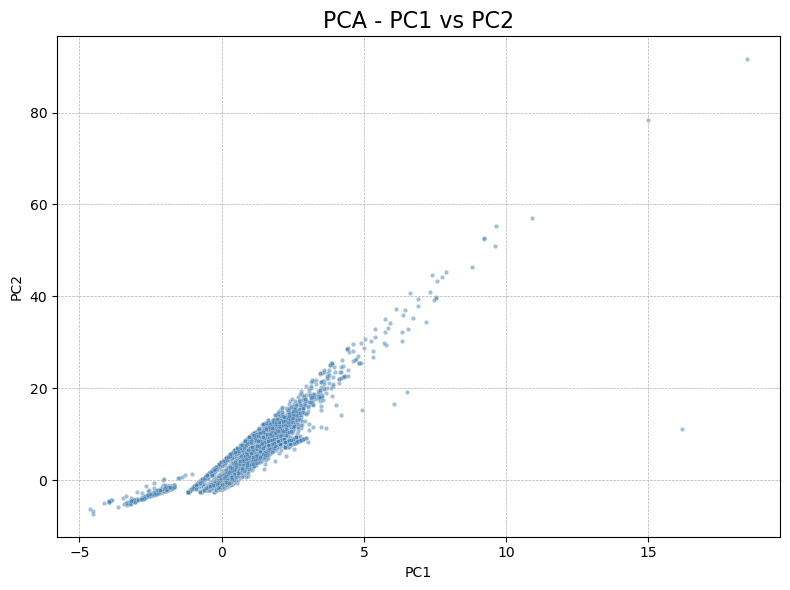

In [ ]:
# PCA - PC1 vs PC2
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=pca_df_sample,
    x="PC1",
    y="PC2",
    color="steelblue",
    alpha=0.5,
    s=10
)
plt.title("PCA - PC1 vs PC2", fontsize=16)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True, linestyle="--", linewidth=0.5)
plt.tight_layout()
plt.show()
